In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.genfromtxt("iris_full.csv", delimiter=",")
A

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [4]:
X = A[:, 0:4]
y = A[:,-1]

In [5]:
bias = np.ones((len(y), 1))
X_bias = np.concatenate((bias, X), axis=1)
X_bias

array([[1. , 5.1, 3.5, 1.4, 0.2],
       [1. , 4.9, 3. , 1.4, 0.2],
       [1. , 4.7, 3.2, 1.3, 0.2],
       [1. , 4.6, 3.1, 1.5, 0.2],
       [1. , 5. , 3.6, 1.4, 0.2],
       [1. , 5.4, 3.9, 1.7, 0.4],
       [1. , 4.6, 3.4, 1.4, 0.3],
       [1. , 5. , 3.4, 1.5, 0.2],
       [1. , 4.4, 2.9, 1.4, 0.2],
       [1. , 4.9, 3.1, 1.5, 0.1],
       [1. , 5.4, 3.7, 1.5, 0.2],
       [1. , 4.8, 3.4, 1.6, 0.2],
       [1. , 4.8, 3. , 1.4, 0.1],
       [1. , 4.3, 3. , 1.1, 0.1],
       [1. , 5.8, 4. , 1.2, 0.2],
       [1. , 5.7, 4.4, 1.5, 0.4],
       [1. , 5.4, 3.9, 1.3, 0.4],
       [1. , 5.1, 3.5, 1.4, 0.3],
       [1. , 5.7, 3.8, 1.7, 0.3],
       [1. , 5.1, 3.8, 1.5, 0.3],
       [1. , 5.4, 3.4, 1.7, 0.2],
       [1. , 5.1, 3.7, 1.5, 0.4],
       [1. , 4.6, 3.6, 1. , 0.2],
       [1. , 5.1, 3.3, 1.7, 0.5],
       [1. , 4.8, 3.4, 1.9, 0.2],
       [1. , 5. , 3. , 1.6, 0.2],
       [1. , 5. , 3.4, 1.6, 0.4],
       [1. , 5.2, 3.5, 1.5, 0.2],
       [1. , 5.2, 3.4, 1.4, 0.2],
       [1. , 4

In [9]:
# xây dựng one_hot vector
def one_hot(y):
    δ = np.zeros((len(y), len(np.unique(y))))
    for i in range(len(np.unique(y))):
        δ[:,i] = (y==i)
    return δ

In [14]:
# xây dựng hàm loss
def loss(X, θ, δ):
    t = np.exp(θ.dot(X.T))
    z = np.sum(t, axis=0)
    tmp = δ.T * np.log(t/z)
    l = np.sum(tmp)
    return -l / X.shape[0]

# xây dựng hàm gradient
def gradient(X,θ,δ):
    t = np.exp(θ.dot(X.T))
    z = np.sum(t, axis=0)
    P = t / z
    θ_gra = (P - δ.T).dot(X)
    return θ_gra / X.shape[0]

# xây dựng hàm update
def update(X,θ,δ, n= 0.01):
    θ_gra = gradient(X,θ,δ)
    θ_new = θ - n * θ_gra
    return θ_new


# Sử dụng stotatic

In [21]:
epochs =500
cost =[]
θs=[]
θ = np.ones((len(np.unique(y)),X_bias.shape[1]))
δ = one_hot(y)
for epoch in range(epochs):
    for i in range(len(y)):
        X_train = X_bias[i:i+1, :]
        y_train = y[i]
        δ_train = δ[i:i+1,:]
        
        t = loss(X_train, θ, δ_train)
        cost.append(t)
        
        θ= update(X_train, θ, δ_train)

cost

[1.0986122886681098,
 0.8591010857380301,
 0.6961366882423367,
 0.5787605722391929,
 0.44468385240545294,
 0.3326504663622935,
 0.3474553184372172,
 0.27916780455426404,
 0.30300877576993906,
 0.2337756349312263,
 0.1670623987979652,
 0.18647447848227902,
 0.1872699592014672,
 0.2044892904483625,
 0.09617029732260694,
 0.0823839361760313,
 0.09734198812553906,
 0.10979193367432849,
 0.07603790027427478,
 0.09076281140372847,
 0.08350766290162688,
 0.0836002153548787,
 0.10372778505916687,
 0.0814345083034064,
 0.08351950978877916,
 0.08494446320294247,
 0.07273569492673822,
 0.06367102141194438,
 0.06376050686504602,
 0.07784125851572239,
 0.07389488338952485,
 0.051139848728495294,
 0.04424384494972391,
 0.037001286606161164,
 0.06404685028045456,
 0.059697205158292,
 0.04178455648308754,
 0.05859508353493606,
 0.07502737644156526,
 0.04553689736751289,
 0.04611966617124892,
 0.08217540459524036,
 0.06298036811892785,
 0.03989396443703897,
 0.032470850229462084,
 0.05112540887450324,


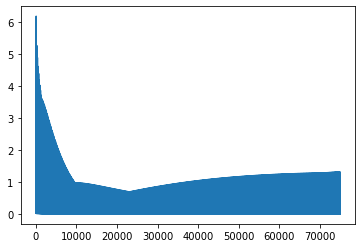

In [22]:
t= []
for i in range(len(cost)):
    t.append(i)

plt.plot(t,cost)

# Sử dụng batch

In [23]:
cost_batch=[]
θs_batch=[]
θ_batch = np.ones((len(np.unique(y)),X_bias.shape[1]))
δ_batch = one_hot(y)
epochs_batch = 700
for epoch in range(epochs_batch):
    t = loss(X_bias, θ_batch, δ_batch)
    cost_batch.append(t)
    
    θ_batch= update(X_bias, θ_batch, δ_batch)
    θs_batch.append(θ_batch)
    
cost_batch

[1.0986122886681096,
 1.0861623609360702,
 1.075947603474453,
 1.0671558226289335,
 1.0592852920545222,
 1.052024503884671,
 1.0451789920268357,
 1.0386266174249814,
 1.0322901419893664,
 1.0261203407378205,
 1.020085558011881,
 1.0141652178900304,
 1.0083457706369294,
 1.0026181467496567,
 0.9969761487605141,
 0.9914154295558459,
 0.9859328396550423,
 0.980526007971487,
 0.9751930712032536,
 0.9699324983904163,
 0.9647429767477803,
 0.9596233371583825,
 0.9545725054609763,
 0.9495894705847995,
 0.9446732637284716,
 0.939822944800266,
 0.9350375936429358,
 0.9303163044149027,
 0.925658182053794,
 0.9210623401118456,
 0.9165278994921175,
 0.9120539877727276,
 0.9076397389112276,
 0.9032842931909818,
 0.8989867973178661,
 0.8947464046065742,
 0.8905622752165103,
 0.8864335764110558,
 0.8823594828232213,
 0.8783391767168394,
 0.8743718482365459,
 0.8704566956425136,
 0.8665929255276782,
 0.862779753016387,
 0.8590164019441403,
 0.8553021050186019,
 0.8516361039623352,
 0.8480176496379228,

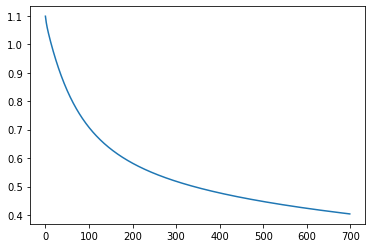

In [24]:
t1=[]
for i in range(len(cost_batch)):
    t1.append(i)
    
plt.plot(t1, cost_batch)